## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!

In [1]:
# Import Libraries 
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# step 1: Set up parameters 
#location coordinates for London
latitude = 51.5074
longitude = -0.1278

#date Range
start_date = '2022-01-01'
end_date = '2022-12-31'

#variables to fetch 
hourly_variables = ['precipitation']

In [3]:
# step 2: make the API request 
url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
        'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response = requests.get(url, params= params)

In [4]:
#check if the request was successful

if response.status_code == 200:
    print('data fetched successfully')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

data fetched successfully


In [5]:
# step 3: Load data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [6]:
# step 4 : Data cleaning 

# checking the data type
df.dtypes

time              object
precipitation    float64
dtype: object

In [7]:
# converting the time to datetime

df['time'] = pd.to_datetime(df['time'])
# set time as the index

df.set_index('time', inplace = True)



In [8]:
#check for missing value 

df.isna().sum()

precipitation    0
dtype: int64

In [9]:
df.head()

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0


In [10]:
# Handling missing value if any 
df.fillna(method ='ffill', inplace = True)

In [11]:
# step 5: EDA
# summary statistics

df.describe()

,precipitation
count,8760.000000
mean,0.075696
std,0.404506
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


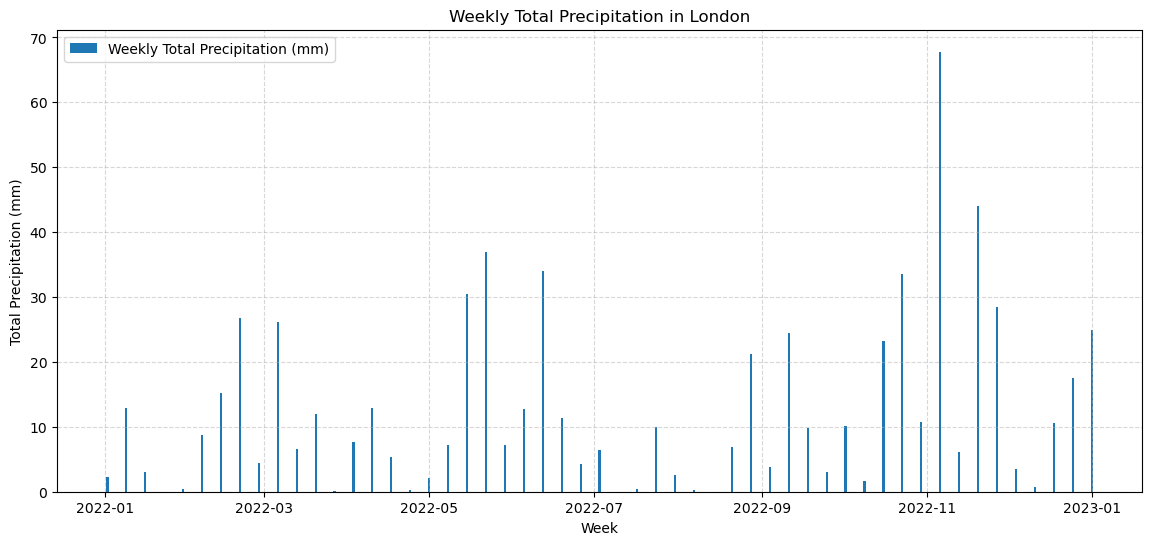

In [12]:
# Plot Hourly Precipitation Over Time (London)
# Weekly total precipitation (London)
weekly_precip_london = df['precipitation'].resample('W').sum()

# Plot bar chart
plt.figure(figsize=(14, 6))
plt.bar(weekly_precip_london.index, weekly_precip_london, label='Weekly Total Precipitation (mm)')

plt.title('Weekly Total Precipitation in London')
plt.xlabel('Week')
plt.ylabel('Total Precipitation (mm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



In [13]:
# step 6 :  Compare with anoher loaction (Seattle)

# coordinates for Seattle

latitude_SE = 47.6062
longitude_SE = -122.3321
params_SE = {
        'latitude': latitude_SE,
    'longitude': longitude_SE,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_SE = requests.get(url, params= params_SE)

In [14]:
#check if the request was successful

if response_SE.status_code == 200:
    print('data fetched successfully')
else:
    print(f'Failed to fetch data. Status code: {response_SE.status_code}')

data fetched successfully


In [15]:
# load and clean Seattle data 
data_SE = response_SE.json()
hourly_data_SE = data_SE['hourly']
df_SE = pd.DataFrame(hourly_data_SE)

df_SE['time'] = pd.to_datetime(df_SE['time'])
df_SE.set_index('time', inplace=True)
df_SE.fillna(method='ffill', inplace=True)
df_SE.head()

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0


In [16]:
df_SE.describe()

,precipitation
count,8760.000000
mean,0.129132
std,0.463708
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.700000


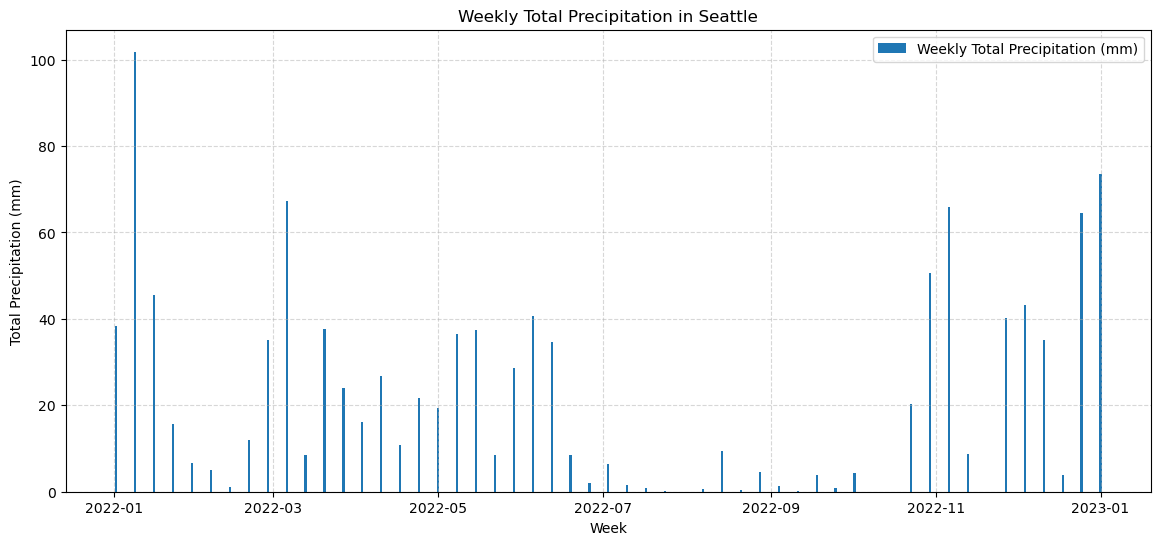

In [17]:
# Plot Hourly Precipitation Over Time (Seattle)
# Weekly total precipitation (Seattle)
weekly_precip_Seattle = df_SE['precipitation'].resample('W').sum()

# Plot bar chart
plt.figure(figsize=(14, 6))
plt.bar(weekly_precip_Seattle.index, weekly_precip_Seattle , label='Weekly Total Precipitation (mm)')

plt.title('Weekly Total Precipitation in Seattle')
plt.xlabel('Week')
plt.ylabel('Total Precipitation (mm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [18]:

total_london = weekly_precip_london.sum()
total_seattle = weekly_precip_Seattle.sum()

print("London Total:", total_london)
print("Seattle Total:", total_seattle)



London Total: 663.1
Seattle Total: 1131.2


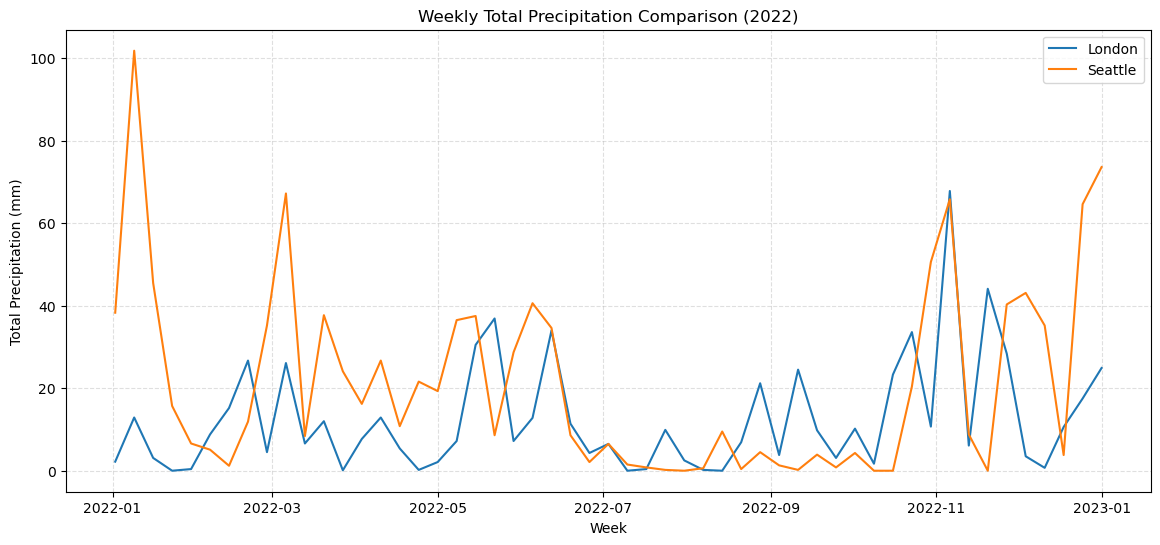

In [19]:
plt.figure(figsize=(14,6))
plt.plot(weekly_precip_london.index, weekly_precip_london, label='London')
plt.plot(weekly_precip_Seattle.index, weekly_precip_Seattle, label='Seattle')

plt.title('Weekly Total Precipitation Comparison (2022)')
plt.xlabel('Week')
plt.ylabel('Total Precipitation (mm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


# Final Comparison Analysis

### The weekly precipitation comparison shows that Seattle receives considerably more rainfall than London over the year 2022. Seattle experiences especially high rainfall during the winter months such as January and March, with multiple weeks accumulating significantly more precipitation than London. London has some isolated weeks with heavier rainfall, particularly around October–November, but these events are less frequent and generally lower in magnitude. Overall, the chart clearly indicates that Seattle has a wetter climate, accumulating more total rainfall across the year compared to London.